# Evaluating the Einstein radius of our composite models

Import useful packages

In [7]:
import sys
sys.path.append('../..')

from matplotlib import rc, cm, rcParams
rc('text', usetex=True)
rc('font', family='serif')
rcParams.update({'font.size': 18})
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from lenstronomy.LensModel.lens_model import LensModel
from scipy.optimize import fsolve

Import the input kwargs

In [2]:
sample = 'golden'
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'
input_kwargs = pd.read_csv(path + '/datasets/' + sample + '_sample_input_kwargs.csv')

## Method of the paper v1

We consider
$
\theta_{\rm E} = \theta_{\rm E, b} + \alpha_{\rm NFW}(\theta_{\rm E, b})
$
for simplicity.

In [3]:
theta_E_v1 = input_kwargs['theta_E']
print(theta_E_v1)

0     1.149321
1     1.004845
2     1.114515
3     1.725652
4     0.609137
        ...   
59    1.209422
60    0.645238
61    1.314664
62    1.056902
63    0.854568
Name: theta_E, Length: 64, dtype: float64


## More accurate method

We may define the Einstein radius $\theta_{\rm E}$ as the radius of a disk such that the average convergence is unity,
$$
\bar{\kappa}(\theta_{\rm E}) = 1 .
$$

We will treat our composite lens as if the components were aligned and axially symmetric, for simplicity. This implies that
$$
\bar{\kappa}(\theta) = \frac{\alpha(\theta)}{\theta} \ ,
$$
which also confirms that at the Einstein radius we have $\alpha(\theta_{\rm E})=\theta_{\rm E}$.

In [4]:
def estimate_Einstein_radius(R_sersic, n_sersic, k_eff, Rs, alpha_Rs, guess=1):
    """
    Finds the value theta_E of the Einstein radius such that
    alpha(theta_E) = theta_E
    """
    
    lens = LensModel(lens_model_list=['SERSIC', 'NFW'])
    kwargs_sersic = {'R_sersic': R_sersic,
                     'n_sersic': n_sersic,
                     'k_eff': k_eff}
    kwargs_nfw = {'Rs': Rs, 'alpha_Rs': alpha_Rs}
    kwargs_lens = [kwargs_sersic, kwargs_nfw]
    
    func = lambda theta: lens.alpha(x=theta, y=0, kwargs=kwargs_lens)[0] - theta
    theta_E = fsolve(func, guess)[0]
    
    return theta_E

In [5]:
theta_E_v2 = []
for n in range():
    theta_E = estimate_Einstein_radius(
        input_kwargs['R_sersic_bar'][n],
        input_kwargs['n_sersic_bar'][n],
        input_kwargs['k_eff_bar'][n],
        input_kwargs['Rs'][n],
        input_kwargs['alpha_Rs'][n],
        guess=input_kwargs['theta_E'][n])
    theta_E_v2.append(theta_E)

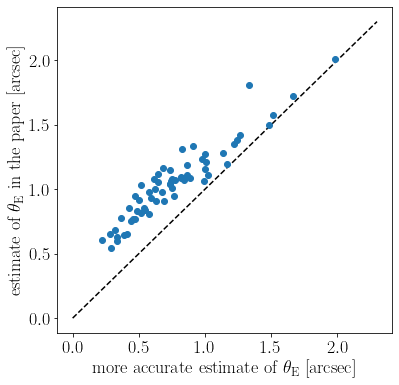

In [8]:
plt.figure(figsize=(6, 6))
plt.plot([0, 2.3], [0, 2.3], 'k--')
plt.plot(theta_E_v2, theta_E_v1, 'o')
plt.xlabel(r'more accurate estimate of $\theta_{\rm E}$ [arcsec]')
plt.ylabel(r'estimate of $\theta_{\rm E}$ in the paper [arcsec]')
plt.savefig('estimate_Einstein_radius.pdf', bbox_inches='tight')
plt.show()